<a href="https://colab.research.google.com/github/Utpal-Mishra/Brightflag/blob/main/Brightflag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Drive

Inorder to fetch the data from google drive to this repository of Google Colaboratory:
- A library "google" is used
- Within the library, a package named as "colab" is used
- Within the package, a sub-package "drive" is imported
- The sub-package "drive", called the function mount(- local path to drive -) to make a link between Google Drive and Google Colaboratory

In [167]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

Inorder the use the existing libraries/ packages/ functionalities required to carry our required computation and modeling:
- A mathematical library is imported
- A data analysis and data manipulation tool is used
- A set of visualization libraries are used
- Modeling libraries are used
- Model testing libraries are used

In [203]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from imblearn import over_sampling as os
from imblearn import pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

### Import Data

To import the data from Google Drive to Google Collaboratory:
- "pandas" library is used
- The library calls the function "read_csv"
- The function feeds in the path of the ".csv" file
- "pandas" converts the data in .csv format to dataframe, named as "data"
- "print()" is used the print a text along with the shape of the dataframe using .shape feature
- To view the dataframe, .head(n) or .tail(n) functions can be used.
 - n is the observations; default value of n is 5
 - head(n) gives top n rows
 - tail(n) displays last n rows

In [180]:
path = "/content/drive/MyDrive/Jobs/Brightflag/bank.csv"
data = pd.read_csv(path)
print("Data Dimensions: ", data.shape)

data.head()

Data Dimensions:  (4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Exploratory Data Analysis (EDA)

To explore the intra-relations as well as cumulative strength of the feature vraibles, Exploratory Data Analysis is performed. Out of a list of EDA analysis, a few of used intepretations is shown below:
- Checking the NULL values
- Analysing frequency of the attributes
- Performing categorical encoding to convert categorical variables into numerical - to be feed for mathematical/ statistical analysis and/or modeling which only accepts numerical values

### Check for NULL Values

The are multiple ways to check for NULL values in the data, out of which isna() and isnull() are commonly used. 
- dataframe.isna() lists down data into boolean values with NULL values as True and non-NULL values as False
- dataframe.isna().sum() is used to list a total os NULL values for each column variable
- dataframe.isna().sum().sum() displays total count of NULL values in the data

In [181]:
if data.isna().sum().sum() == 0:
   print("No EMPTY Values")
else:
  print("Rectify and Resolve EMPTY Values")

No EMPTY Values


### Listing Uniques Feature Values

 - To analyze the frequency of occurance for the categorical varibles, a function value_counts() can be used. 
 - It is helpful to encounter all the possible values for a feature under given constraint of the data category

In [182]:
print("Jobs Categories:\n", data['job'].value_counts())
print("\n\nMarital Status:\n", data['marital'].value_counts())
print("\n\nEducation Qualifications:\n", data['education'].value_counts())
print("\n\nDefault Status", data['default'].value_counts())
print("\n\nHousing:\n", data['housing'].value_counts())
print("\n\nLoan Desirability:\n", data['loan'].value_counts())
print("\n\nContact Source:\n", data['contact'].value_counts())
print("\n\nContacted Month:\n", data['month'].value_counts())
print("\n\nPredicted Outcome:\n", data['poutcome'].value_counts())

Jobs Categories:
 management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64


Marital Status:
 married     2797
single      1196
divorced     528
Name: marital, dtype: int64


Education Qualifications:
 secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64


Default Status no     4445
yes      76
Name: default, dtype: int64


Housing:
 yes    2559
no     1962
Name: housing, dtype: int64


Loan Desirability:
 no     3830
yes     691
Name: loan, dtype: int64


Contact Source:
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


Contacted Month:
 may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: mo

### Encoding Attributes

- The are multiple ways to encode a categorical variable, for example Label Encoding and/ or One Hot Encoding and/ or Dummy Variable, etc. 
- The approach in these algorithms is to add n-1 columns, corresponding to n categorical within a respective feature and imply the same for the next cateogical column variable.
- Due to creating of n-1 new feature variable for n unique categories in a column, there exist exact one column specifically for n categories and thus, are represented with binary elements i.e., 0 and 1.
- 0 dedictates the absence while 1 indicates the presence of a categorical variable for a particiular observation.
- Another approach used in this reposotiry is to encode using a replace(), which replaces all the categorical into numeric counts (can be also adjusted into multiple formats)

In [183]:
data['job'] = data['job'].replace({"unknown": 0, "student": 1, "housemaid": 2, "technician": 3, "management": 4, "blue-collar": 5, "services": 6, "admin.": 7, "self-employed": 8, "entrepreneur": 9, "retired": 10, "unemployed": 11})
data['marital'] = data['marital'].replace({"divorced": 0, "single": 1, "married": 2})
data['education'] = data['education'].replace({"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3})
data['default'] = data['default'].replace({"no": 0, "yes": 1})
data['housing'] = data['housing'].replace({"no": 0, "yes": 1})
data['loan'] = data['loan'].replace({"no": 0, "yes": 1})
data['contact'] = data['contact'].replace({"unknown": 0, "cellular": 1, "telephone": 2})
data['month'] = data['month'].replace({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})
data['poutcome'] = data['poutcome'].replace({"unknown": 0, "success": 1, "failure": 2, "other": 3})
data['y'] = data['y'].replace({"no": 0, "yes": 1})

data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11,2,1,0,1787,0,0,1,19,10,79,1,-1,0,0,0
1,33,6,2,2,0,4789,1,1,1,11,5,220,1,339,4,2,0
2,35,4,1,3,0,1350,1,0,1,16,4,185,1,330,1,2,0
3,30,4,2,3,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,5,2,2,0,0,1,0,0,5,5,226,1,-1,0,0,0
5,35,4,1,3,0,747,0,0,1,23,2,141,2,176,3,2,0
6,36,8,2,3,0,307,1,0,1,14,5,341,1,330,2,3,0
7,39,3,2,2,0,147,1,0,1,6,5,151,2,-1,0,0,0
8,41,9,2,3,0,221,1,0,0,14,5,57,2,-1,0,0,0
9,43,6,2,1,0,-88,1,1,1,17,4,313,1,147,2,2,0


### Editing Valid Data Entry

The balance for an account be -ve thus, all the observations with a negative balance amount are discarded

In [184]:
data = data[data['balance'] >= 0]

## Pre-Modelling Phase

### Spliting the data into train and test

- Before modeling the data or having an intension to test the features with the significance, it is required to be splitted into train and test portions.
- Train portion guides in training the model to generlize the understanding and the relationship between the features
- Where as Test portion is used to decipher how well the model is trained and/ or how woptimal the model performs to an unseen set of abservations.
- To implement this step, the dataframe is conveted to an array of feature set and then split into train and test with a ratio of 3:1
- The split can easily be performed using slicing but here it is performed using train_test_split()
- Basic paramters of the train_test_split() are: train portion (X), test portion (Y) and the split ratio w.r.t to test data size relative to 1.
- The train_test_split() returns 4 outcomes namely, 
  - Independent train features; X_train
  - Dependent training target variable; Y_train
  - Independent test atrributes; X_test
  - Depenedent test target variable; Y_test

In [185]:
dataset = data.values

X = dataset[: , :-1]
Y = dataset[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Finding P-values

- Also known as the Probability Value
- By Google, it is defines as the probability - in statistical hypothesis testing - that a particular statistical measure, such as the mean or standard deviation, of an assumed probability distribution will be greater than or equal to (or less than or equal to in some instances) observed results.
- p-value > 0.05, it means we fail to reject a null hypothesis - no significant evidence
- p-value < 0.05, it means we reject a null hypothesis - significant evidence
- To implement this, sm sub-package is imported from the library "statsmodels" and within a packages "api"

ITERATION 1: If p-value is > 0.05 remove the feature variable else keep it

In [186]:
import statsmodels.api as sm

logit = sm.Logit(Y_train, X_train)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.296899
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3116
Model:                          Logit   Df Residuals:                     3100
Method:                           MLE   Df Model:                           15
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2034
Time:                        05:04:00   Log-Likelihood:                -925.14
converged:                       True   LL-Null:                       -1161.3
Covariance Type:            nonrobust   LLR p-value:                 3.970e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0195      0.005     -3.811      0.000      -0.030      -0.009
x2            -0.0541      0.

In [187]:
dataset = data.drop(['default', 'poutcome'], axis = 1).values

X = dataset[: , :-1]
Y = dataset[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.297272
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3116
Model:                          Logit   Df Residuals:                     3102
Method:                           MLE   Df Model:                           13
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.1997
Time:                        05:04:04   Log-Likelihood:                -926.30
converged:                       True   LL-Null:                       -1157.4
Covariance Type:            nonrobust   LLR p-value:                 1.584e-90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0260      0.005     -5.015      0.000      -0.036      -0.016
x2            -0.0384      0.

ITERATION 2: If p-value is > 0.05 remove the feature variable else keep it

In [188]:
dataset = data.drop(['default', 'poutcome', 'balance'], axis = 1).values

X = dataset[: , :-1]
Y = dataset[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.291136
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3116
Model:                          Logit   Df Residuals:                     3103
Method:                           MLE   Df Model:                           12
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.1821
Time:                        05:04:12   Log-Likelihood:                -907.18
converged:                       True   LL-Null:                       -1109.2
Covariance Type:            nonrobust   LLR p-value:                 5.350e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0286      0.005     -5.400      0.000      -0.039      -0.018
x2            -0.0474      0.

ITERATION 3: If p-value is > 0.05 remove the feature variable else keep it

In [189]:
dataset = data.drop(['default', 'poutcome', 'balance', 'pdays'], axis = 1).values

X = dataset[: , :-1]
Y = dataset[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.286053
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3116
Model:                          Logit   Df Residuals:                     3104
Method:                           MLE   Df Model:                           11
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.2178
Time:                        05:04:26   Log-Likelihood:                -891.34
converged:                       True   LL-Null:                       -1139.5
Covariance Type:            nonrobust   LLR p-value:                 1.945e-99
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0185      0.005     -3.617      0.000      -0.029      -0.008
x2            -0.0513      0.

### Resolving Data Imbalanced Problem

Visualizing the imbalance problem with the target varible

In [190]:
imbalance = data['y'].value_counts().to_frame().reset_index().rename(columns = {"index": "label", "y": "count"})
imbalance = round(imbalance['count'].apply(lambda x: x/imbalance['count'].sum()*100)).to_frame().reset_index().rename(columns = {"index": "label", "count": "percent"})

fig = px.bar(imbalance, x='label', y='percent', color='label', width=100)
fig.update_xaxes(title_text = "Class Label", rangeslider_visible=False, showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text = "Label Proportions", showline=True, linewidth=2, linecolor='black', mirror=True)
# fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(height=500, width=600, title_text="Class Label Proportions in the Data") 
fig.show()

In case of imbalance target variable, we can perform:
1. Undersampling - reducing the observations of major class to minority, random samples removal
2. Oversampling - increasing the size of minority class, duplicating samples
3. Undersampling + Oversampling: reducing the observations of major class to minority as well as increasing the size of minority class
4. In this worksheet, SMOTE library is used to perform oversampling on the training dataset
5. random_state is used t0 ensure a deterministic split between samples/ observations

In [191]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1234)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

## Modeling Phase

Uilding models with 
- a few tradition classification algorithms
- a couple of deep learning networks
- cross-validation pipeline of models

### Decision Tree

In [192]:
parameters = {'max_depth':range(3,20)}
model = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
model.fit(X=X_train, y=Y_train)
tree_model = model.best_estimator_
print (model.best_score_, model.best_params_)

Y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("\nTest Accuracy: ", 100*((cm[0][0] +cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])))

0.8841149815775099 {'max_depth': 18}

Confusion Matrix:
[[785 136]
 [ 56  62]]

Test Accuracy:  81.52069297401347


In [193]:
text_representation = tree.export_text(tree.DecisionTreeClassifier().fit(X=X, y=Y))
print(text_representation)

|--- feature_9 <= 645.50
|   |--- feature_9 <= 211.50
|   |   |--- feature_0 <= 70.50
|   |   |   |--- feature_0 <= 19.50
|   |   |   |   |--- feature_8 <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_8 >  4.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  19.50
|   |   |   |   |--- feature_8 <= 4.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- feature_9 <= 79.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_9 >  79.00
|   |   |   |   |   |   |   |--- feature_1 <= 4.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 112.00
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_9 <= 85.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_9 >  85.00
|   |   | 

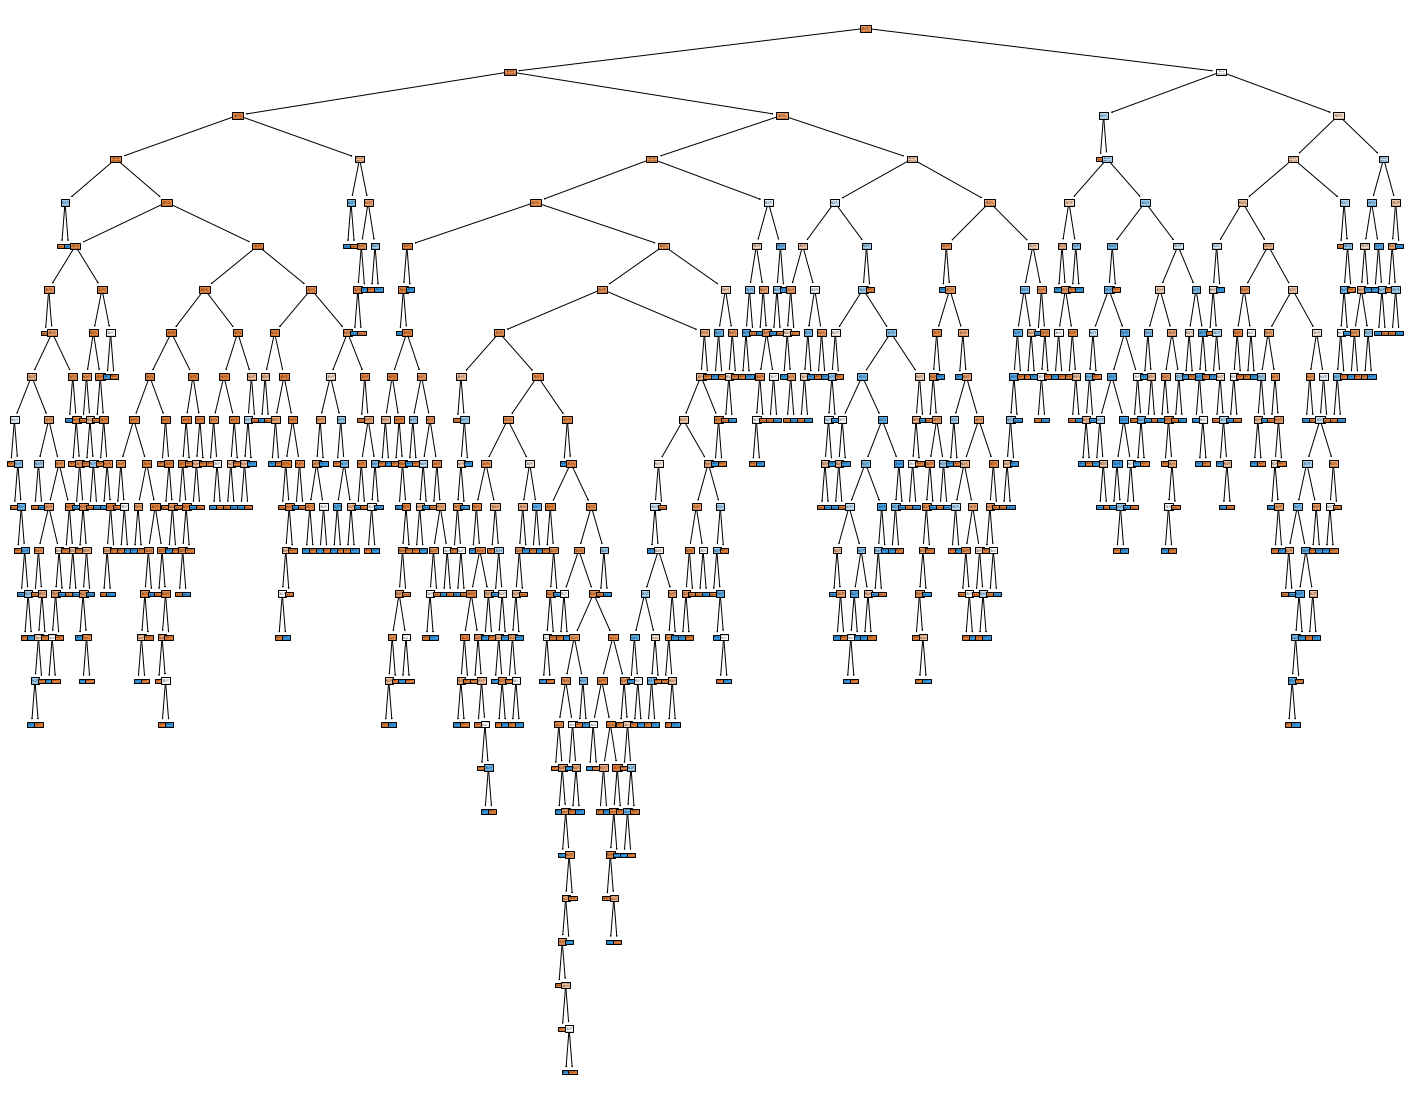

In [194]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree.DecisionTreeClassifier().fit(X=X, y=Y), filled=True)

### Random Forest

In [195]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

print("Model Training Score: ", round(model.score(X_train, Y_train) * 100, 2), '%\n')

Y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("\nTest Accuracy: ", 100*((cm[0][0] +cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])))
#pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Model Training Score:  100.0 %


Confusion Matrix:
[[809 112]
 [ 55  63]]

Test Accuracy:  83.92685274302214


### Deep Learning

Building Network with 1 Hidden Layers

In [196]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

_, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('\nAccuracy: %.2f' % (accuracy*100))

Epoch 1/100
172/172 - 1s - loss: 1.3533 - accuracy: 0.6068 - 775ms/epoch - 5ms/step
Epoch 2/100
172/172 - 0s - loss: 0.7478 - accuracy: 0.6789 - 221ms/epoch - 1ms/step
Epoch 3/100
172/172 - 0s - loss: 0.5796 - accuracy: 0.7241 - 218ms/epoch - 1ms/step
Epoch 4/100
172/172 - 0s - loss: 0.5026 - accuracy: 0.7606 - 236ms/epoch - 1ms/step
Epoch 5/100
172/172 - 0s - loss: 0.4744 - accuracy: 0.7770 - 210ms/epoch - 1ms/step
Epoch 6/100
172/172 - 0s - loss: 0.4544 - accuracy: 0.7925 - 207ms/epoch - 1ms/step
Epoch 7/100
172/172 - 0s - loss: 0.4342 - accuracy: 0.8096 - 242ms/epoch - 1ms/step
Epoch 8/100
172/172 - 0s - loss: 0.4274 - accuracy: 0.8120 - 198ms/epoch - 1ms/step
Epoch 9/100
172/172 - 0s - loss: 0.4329 - accuracy: 0.8074 - 213ms/epoch - 1ms/step
Epoch 10/100
172/172 - 0s - loss: 0.4288 - accuracy: 0.8069 - 223ms/epoch - 1ms/step
Epoch 11/100
172/172 - 0s - loss: 0.4134 - accuracy: 0.8189 - 221ms/epoch - 1ms/step
Epoch 12/100
172/172 - 0s - loss: 0.4315 - accuracy: 0.8154 - 203ms/epoch 

In [197]:
Y_pred = model.predict(X_test)

Y = []

for i in Y_pred:
  for k in i:
    Y.append(k)

Y_pred = np.asarray(Y)
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()

Y_pred = np.where(p_pred > 0.6, 1, 0)
print(Y_pred)

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("\nTest Accuracy: ", 100*((cm[0][0] +cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])))

[0 1 1 ... 1 0 0]

Confusion Matrix:
[[751 170]
 [ 38  80]]

Test Accuracy:  79.98075072184793


Building Network with 2 Hidden Layers

In [198]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

_, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('\nAccuracy: %.2f' % (accuracy*100))

Epoch 1/100
172/172 - 1s - loss: 3.7633 - accuracy: 0.6421 - 839ms/epoch - 5ms/step
Epoch 2/100
172/172 - 0s - loss: 2.5352 - accuracy: 0.6709 - 287ms/epoch - 2ms/step
Epoch 3/100
172/172 - 0s - loss: 2.6388 - accuracy: 0.6880 - 308ms/epoch - 2ms/step
Epoch 4/100
172/172 - 0s - loss: 1.5541 - accuracy: 0.7194 - 308ms/epoch - 2ms/step
Epoch 5/100
172/172 - 0s - loss: 2.3352 - accuracy: 0.7126 - 304ms/epoch - 2ms/step
Epoch 6/100
172/172 - 0s - loss: 2.0790 - accuracy: 0.7196 - 293ms/epoch - 2ms/step
Epoch 7/100
172/172 - 0s - loss: 1.6073 - accuracy: 0.7420 - 311ms/epoch - 2ms/step
Epoch 8/100
172/172 - 0s - loss: 1.3937 - accuracy: 0.7436 - 309ms/epoch - 2ms/step
Epoch 9/100
172/172 - 0s - loss: 1.7137 - accuracy: 0.7429 - 310ms/epoch - 2ms/step
Epoch 10/100
172/172 - 0s - loss: 1.7944 - accuracy: 0.7310 - 302ms/epoch - 2ms/step
Epoch 11/100
172/172 - 0s - loss: 1.8623 - accuracy: 0.7422 - 315ms/epoch - 2ms/step
Epoch 12/100
172/172 - 0s - loss: 1.6763 - accuracy: 0.7436 - 300ms/epoch 

In [199]:
Y_pred = model.predict(X_test)

Y = []

for i in Y_pred:
  for k in i:
    Y.append(k)

Y_pred = np.asarray(Y)
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()

Y_pred = np.where(p_pred > 0.6, 1, 0)
print(Y_pred)

print("\nConfusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print("\nTest Accuracy: ", 100*((cm[0][0] +cm[1][1])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])))

[0 0 1 ... 0 0 0]

Confusion Matrix:
[[825  96]
 [ 65  53]]

Test Accuracy:  84.50433108758422


### AdaBoost

In [200]:
model=AdaBoostClassifier()

resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

pipeline=Pipeline(steps=[('r', resample), ('m', model)])

cv=RepeatedStratifiedKFold(n_splits=15, n_repeats=5, random_state=1234)

scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X_train, Y_train, scoring=scoring, cv=cv, n_jobs=-1)

print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.8507
Mean Precision: 0.8570
Mean Recall: 0.8507


### Cross-Validation on Multiple Classification Algorithms

In [207]:
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv)
	names.append(name)
	print("%s: %f (%f)" % (name, cv.mean(), cv.std())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

LR: 0.786261 (0.021903)
LDA: 0.791384 (0.036754)
KNN: 0.858822 (0.094981)
CART: 0.875926 (0.040444)
NB: 0.740783 (0.174197)
SVM: 0.656148 (0.045083)


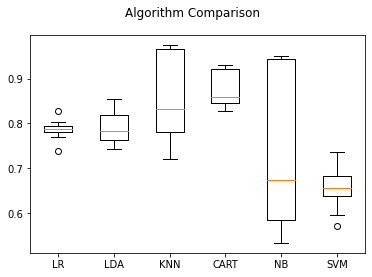

In [208]:
fig = plt.figure()
fig.suptitle('Classification Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()